In [1]:
import sys
sys.executable


'c:\\Users\\Manya Mishra\\AppData\\Local\\Programs\\Python\\Python311\\python.exe'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/startup_funding.csv")
df.head()


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


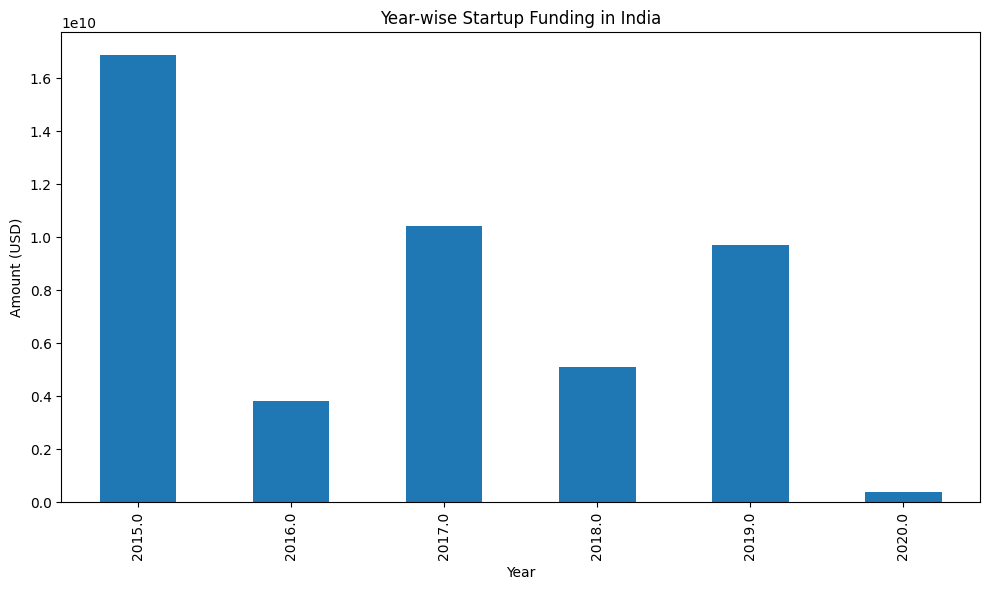

In [9]:
# prepare year-wise funding data and plot
# parse date (day first), extract year
df['Date'] = pd.to_datetime(df['Date dd/mm/yyyy'], dayfirst=True, errors='coerce')
df['Year'] = df['Date'].dt.year

# clean amount column and convert to numeric
df['Amount_clean'] = df['Amount in USD'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Amount_clean'] = pd.to_numeric(df['Amount_clean'], errors='coerce')

# aggregate by year
year_funding = df.dropna(subset=['Year']).groupby('Year')['Amount_clean'].sum().sort_index()

# plot
plt.figure(figsize=(10, 6))
year_funding.plot(kind='bar')
plt.title("Year-wise Startup Funding in India")
plt.ylabel("Amount (USD)")
plt.tight_layout()
plt.savefig("../visuals/year_funding.png")
plt.show()
